In [6]:
import tensorflow as tf
import torch
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from pytorch_pretrained_bert import BertTokenizer, BertConfig
from pytorch_pretrained_bert import BertAdam, BertForSequenceClassification
from tqdm import tqdm, trange
import pandas as pd
import io
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [7]:
#first we have to upload the dataset 
df = pd.read_csv("Twitter_Data.csv")

In [8]:
df.shape

(162980, 2)

In [9]:
df.sample(5)

,clean_text,category
159686,she tried everything including licking the boo...,-1.0
105249,this year about million people applied for 900...,0.0
86227,for the past years modi has been freeloading i...,1.0
88920,for the very first time jobless people like ha...,1.0
31071,far removed from the issues and problems faced...,1.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162976 non-null  object 
 1   category    162973 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.5+ MB


/home/test-1/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


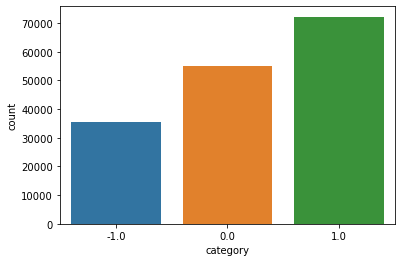

In [11]:
sns.countplot(df.category)
plt.xlabel("category");

In [12]:
def to_sentiment(category):
  if category >0:
    return 1
  elif category <0:
    return -1
  else: 
    return 0

df['sentiment'] = df.category.apply(to_sentiment)

In [13]:
classes = ["positive","negative","neutral"]

/home/test-1/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


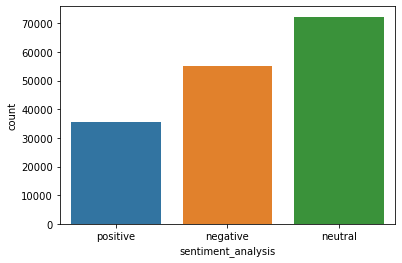

In [14]:
ax = sns.countplot(df.sentiment)
plt.xlabel('sentiment_analysis')
ax.set_xticklabels(classes);


In [ ]:
df['clean_text']=

In [40]:
from transformers import pipeline

In [41]:
SentimentClassifier = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english)


Downloading:   0%|          | 0.00/629 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/255M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

In [45]:
df['clean_text']= df['clean_text'].astype('str')

In [52]:
SentimentClassifier(df.clean_text[100])

[{'label': 'NEGATIVE', 'score': 0.9910538792610168}]

In [54]:
df.head()

,clean_text,category,sentiment
0,when modi promised “minimum government maximum...,-1.0,-1
1,talk all the nonsense and continue all the dra...,0.0,0
2,what did just say vote for modi welcome bjp t...,1.0,1
3,asking his supporters prefix chowkidar their n...,1.0,1
4,answer who among these the most powerful world...,1.0,1


In [55]:
df.sample(10)

,clean_text,category,sentiment
58436,contrary the perception five years the modi go...,1.0,1
122475,whats going your mof and your corrupt finance ...,-1.0,-1
58126,munna could remember modi international platfo...,0.0,0
53187,its not 4th and 5th united states russia china...,0.0,0
79042,drdo chief saraswat member modi govt think tan...,0.0,0
89406,general election 2019 lok sabha election 2019 ...,1.0,1
60449,you deserve narendra modi,0.0,0
53004,narendra modi speech live updates earlier govt...,1.0,1
79040,yesterday anti sattelite missile success credi...,1.0,1
41872,blind deaf movie new channel promoting modi in...,-1.0,-1
